In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:34165' processes=12 threads=96, memory=0.98 TiB>

In [2]:
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
import numpy as np
from mitgcm_assim.ctrls import load_controls_and_sensitivities

data_dir = '/data/SO3/edavenport/tpose6/sep2012/run_ad/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

iteration = 9

In [3]:
# Load all control variables and sensitivities into a Dataset
# This automatically loads grid information and applies proper MITgcm coordinate names
ds = load_controls_and_sensitivities(data_dir, grid_dir, iteration)

print(f"Loaded Dataset with {len(ds.data_vars)} variables:")
for name, da in ds.data_vars.items():
    print(f"  {name}: {da.dims} {da.shape}")
    
print(f"\nDataset coordinates: {list(ds.coords.keys())}")
print(f"\nSample variable dimensions:")
print(f"  Ocean variables (3D): Z, YC, XC")
print(f"  Atmospheric variables (time-dependent): time, YC, XC")

Loaded Dataset with 33 variables:
  xx_theta: ('Z', 'YC', 'XC') (66, 336, 1128)
  xx_salt: ('Z', 'YC', 'XC') (66, 336, 1128)
  xx_uwind: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_vwind: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_atemp: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_aqh: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_lwdown: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_precip: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_swdown: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_vvel: ('Z', 'YC', 'XC') (66, 336, 1128)
  xx_uvel: ('Z', 'YC', 'XC') (66, 336, 1128)
  adxx_theta: ('Z', 'YC', 'XC') (66, 336, 1128)
  adxx_salt: ('Z', 'YC', 'XC') (66, 336, 1128)
  adxx_uwind: ('time', 'YC', 'XC') (14, 336, 1128)
  adxx_vwind: ('time', 'YC', 'XC') (14, 336, 1128)
  adxx_atemp: ('time', 'YC', 'XC') (14, 336, 1128)
  adxx_aqh: ('time', 'YC', 'XC') (14, 336, 1128)
  adxx_lwdown: ('time', 'YC', 'XC') (14, 336, 1128)
  adxx_precip: ('time', 'YC', 'XC') (14, 336, 1128)
  adxx_swdown: ('time', 'YC', 'XC') (14,

In [4]:
print(ds)
ds['XC'] = ds.XC.astype(float)
ds['YC'] = ds.YC.astype(float)
ds['Z'] = ds.Z.astype(float)
ds['XG'] = ds.XG.astype(float)
ds['YG'] = ds.YG.astype(float)

<xarray.Dataset> Size: 3GB
Dimensions:              (Z: 66, YC: 336, XC: 1128, time: 14, XG: 1128,
                          YG: 336, Zl: 66)
Coordinates: (12/16)
  * Z                    (Z) >f4 264B -1.0 -3.0 -5.0 ... -5.25e+03 -5.75e+03
  * YC                   (YC) >f4 1kB -25.92 -25.75 -25.58 ... 29.58 29.75 29.92
  * XC                   (XC) >f4 5kB 104.1 104.2 104.4 ... 291.6 291.8 291.9
  * time                 (time) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * XG                   (XG) >f4 5kB 104.0 104.2 104.3 ... 291.5 291.7 291.8
  * YG                   (YG) >f4 1kB -26.0 -25.83 -25.67 ... 29.5 29.67 29.83
    ...                   ...
    dyG                  (YC, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dxC                  (YC, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    rAw                  (YC, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dxG                  (YG, XC) >f4 2MB dask.array<chunksi

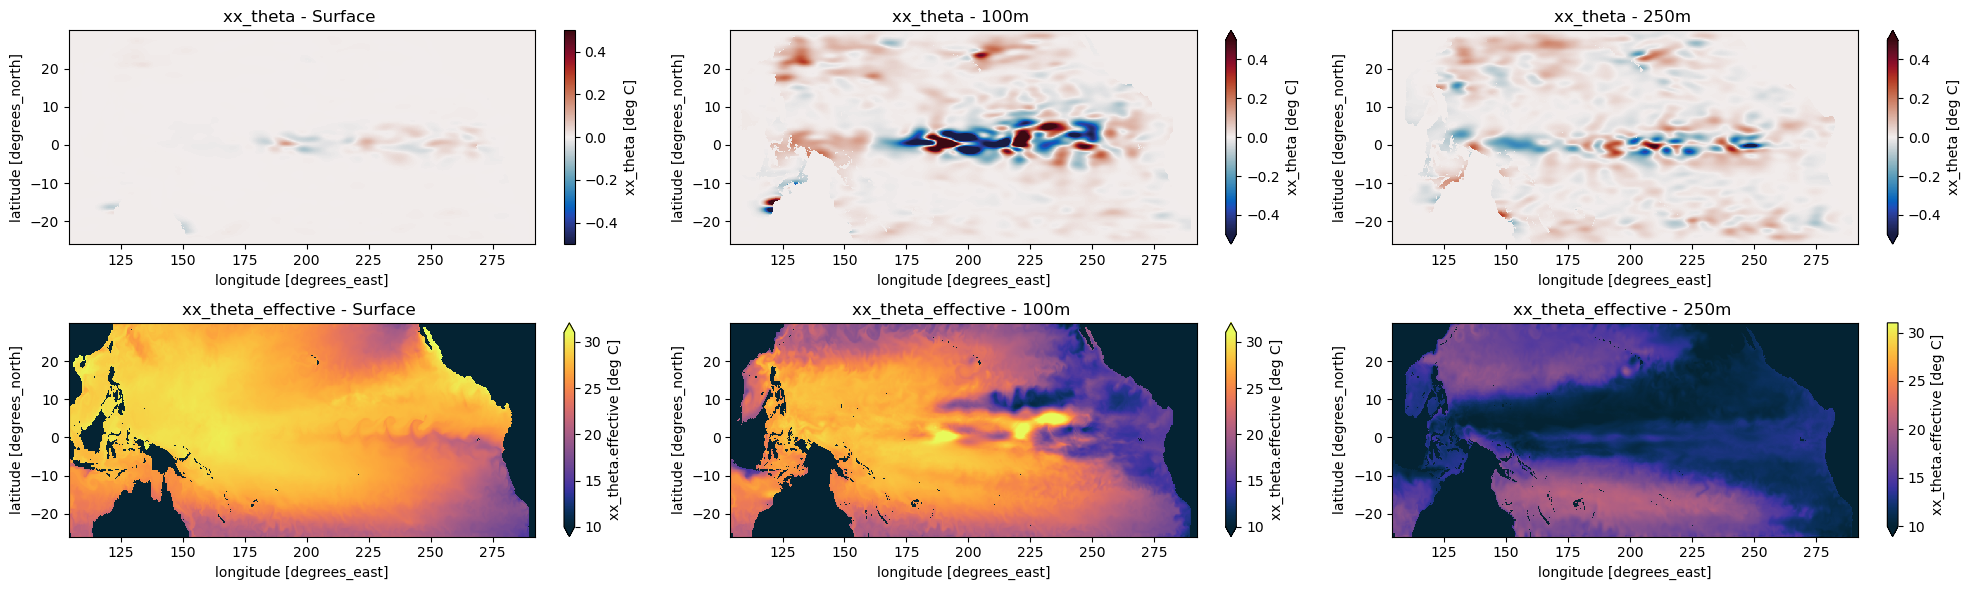

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_theta'].sel(Z=[-1.0],method='nearest').plot(ax=axes[0,0], cmap=cmo.balance, vmin=-5e-1,vmax=5e-1)
axes[0,0].set_title('xx_theta - Surface ')

ds['xx_theta'].sel(Z=[-100.0],method='nearest').plot(ax=axes[0,1],vmin=-5e-1,vmax=5e-1,cmap=cmo.balance)
axes[0,1].set_title('xx_theta - 100m ')

ds['xx_theta'].sel(Z=[-250.0],method='nearest').plot(ax=axes[0,2],vmin=-5e-1,vmax=5e-1,cmap=cmo.balance)
axes[0,2].set_title('xx_theta - 250m ')

ds['xx_theta.effective'].sel(Z=[-1.0],method='nearest').plot(ax=axes[1,0],vmin=10,vmax=31, cmap=cmo.thermal)
axes[1,0].set_title('xx_theta_effective - Surface ')

ds['xx_theta.effective'].sel(Z=[-100.0],method='nearest').plot(ax=axes[1,1],vmin=10,vmax=31,cmap=cmo.thermal)
axes[1,1].set_title('xx_theta_effective - 100m ')

ds['xx_theta.effective'].sel(Z=[-250.0],method='nearest').plot(ax=axes[1,2],vmin=10,vmax=31, cmap=cmo.thermal)
axes[1,2].set_title('xx_theta_effective - 250m ')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_theta_iter' + str(iteration) + '.png')

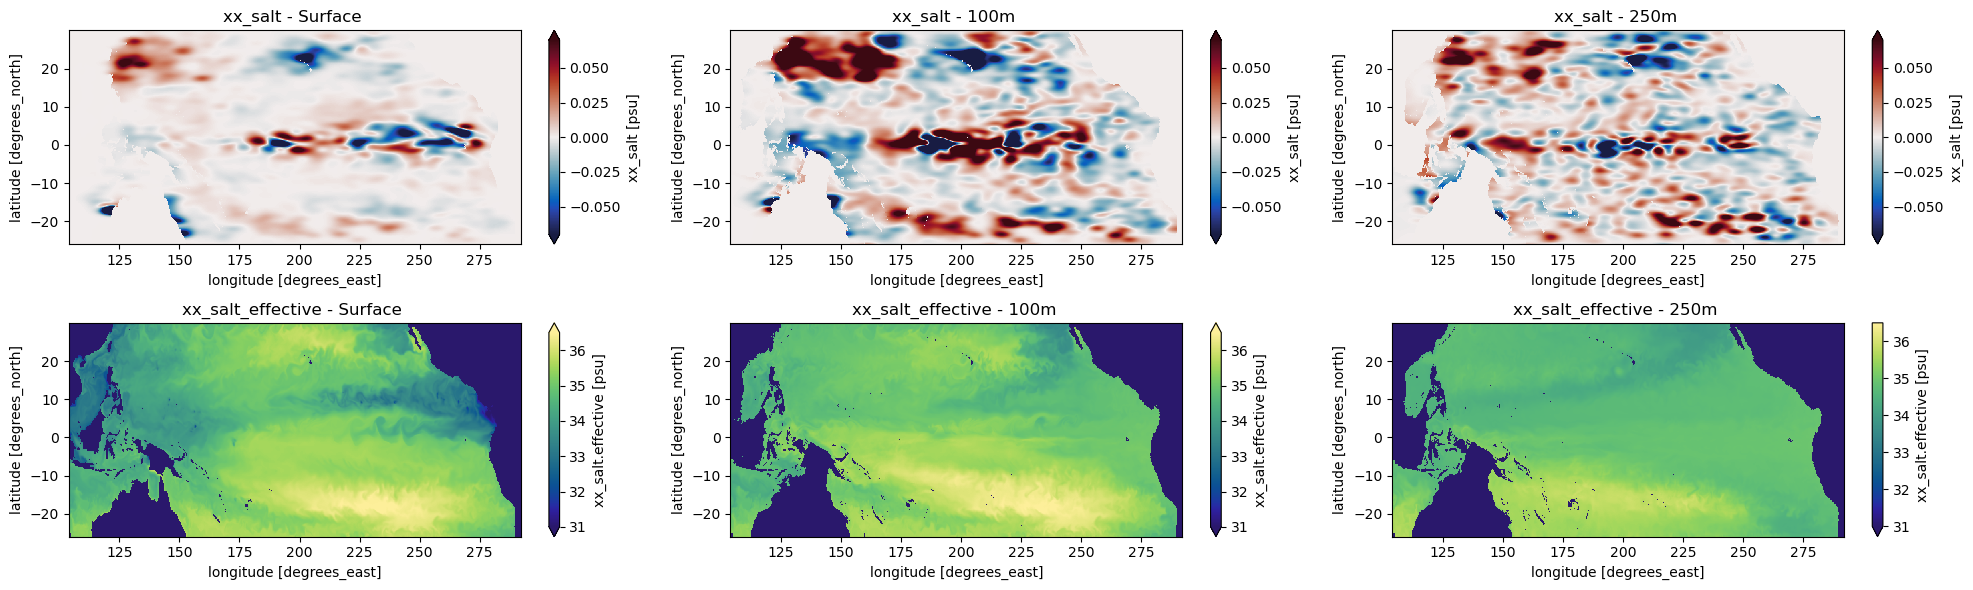

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_salt'].sel(Z=[-1.0],method='nearest').plot(ax=axes[0,0], cmap=cmo.balance, vmin=-7e-2,vmax=7e-2)
axes[0,0].set_title('xx_salt - Surface ')

ds['xx_salt'].sel(Z=[-100.0],method='nearest').plot(ax=axes[0,1],vmin=-7e-2,vmax=7e-2,cmap=cmo.balance)
axes[0,1].set_title('xx_salt - 100m ')

ds['xx_salt'].sel(Z=[-250.0],method='nearest').plot(ax=axes[0,2],vmin=-7e-2,vmax=7e-2,cmap=cmo.balance)
axes[0,2].set_title('xx_salt - 250m ')

ds['xx_salt.effective'].sel(Z=[-1.0],method='nearest').plot(ax=axes[1,0],vmin=31,vmax=36.5, cmap=cmo.haline)
axes[1,0].set_title('xx_salt_effective - Surface ')

ds['xx_salt.effective'].sel(Z=[-100.0],method='nearest').plot(ax=axes[1,1],vmin=31,vmax=36.5, cmap=cmo.haline)
axes[1,1].set_title('xx_salt_effective - 100m ')

ds['xx_salt.effective'].sel(Z=[-250.0],method='nearest').plot(ax=axes[1,2],vmin=31,vmax=36.5, cmap=cmo.haline)
axes[1,2].set_title('xx_salt_effective - 250m ')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_salt_iter' + str(iteration) + '.png')

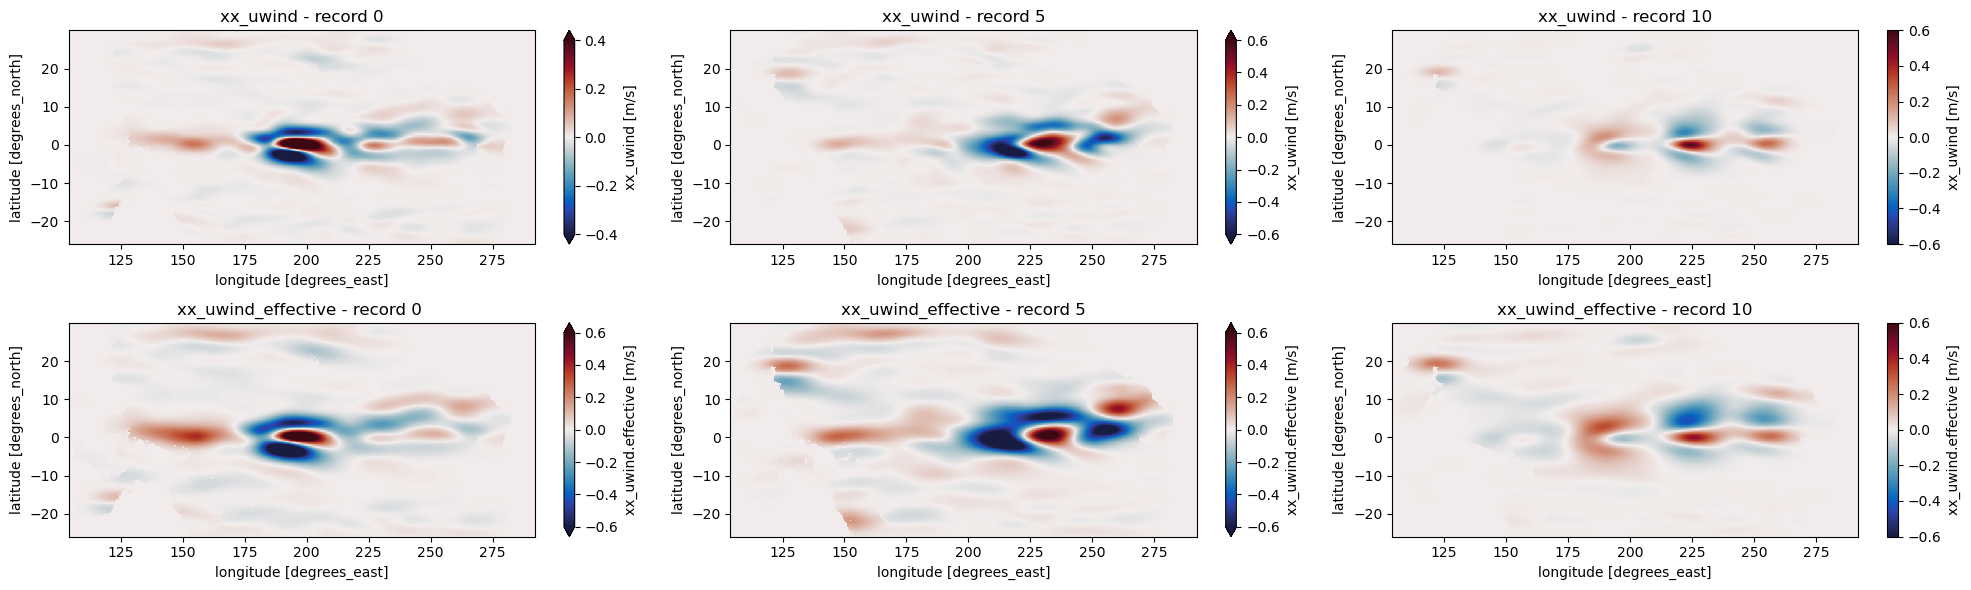

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_uwind'][0].plot(ax=axes[0,0], vmin=-4e-1, vmax=4e-1, cmap=cmo.balance)
axes[0,0].set_title('xx_uwind - record 0')

ds['xx_uwind'][5].plot(ax=axes[0,1],vmin=-6e-1, vmax=6e-1, cmap=cmo.balance)
axes[0,1].set_title('xx_uwind - record 5')

ds['xx_uwind'][10].plot(ax=axes[0,2],vmin=-6e-1, vmax=6e-1, cmap=cmo.balance)
axes[0,2].set_title('xx_uwind - record 10')

ds['xx_uwind.effective'][0].plot(ax=axes[1,0], vmin=-6e-1, vmax=6e-1, cmap=cmo.balance)
axes[1,0].set_title('xx_uwind_effective - record 0 ')

ds['xx_uwind.effective'][5].plot(ax=axes[1,1],vmin=-6e-1, vmax=6e-1, cmap=cmo.balance)
axes[1,1].set_title('xx_uwind_effective - record 5')

ds['xx_uwind.effective'][10].plot(ax=axes[1,2],vmin=-6e-1, vmax=6e-1, cmap=cmo.balance)
axes[1,2].set_title('xx_uwind_effective - record 10')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_uwind_iter' + str(iteration) + '.png')

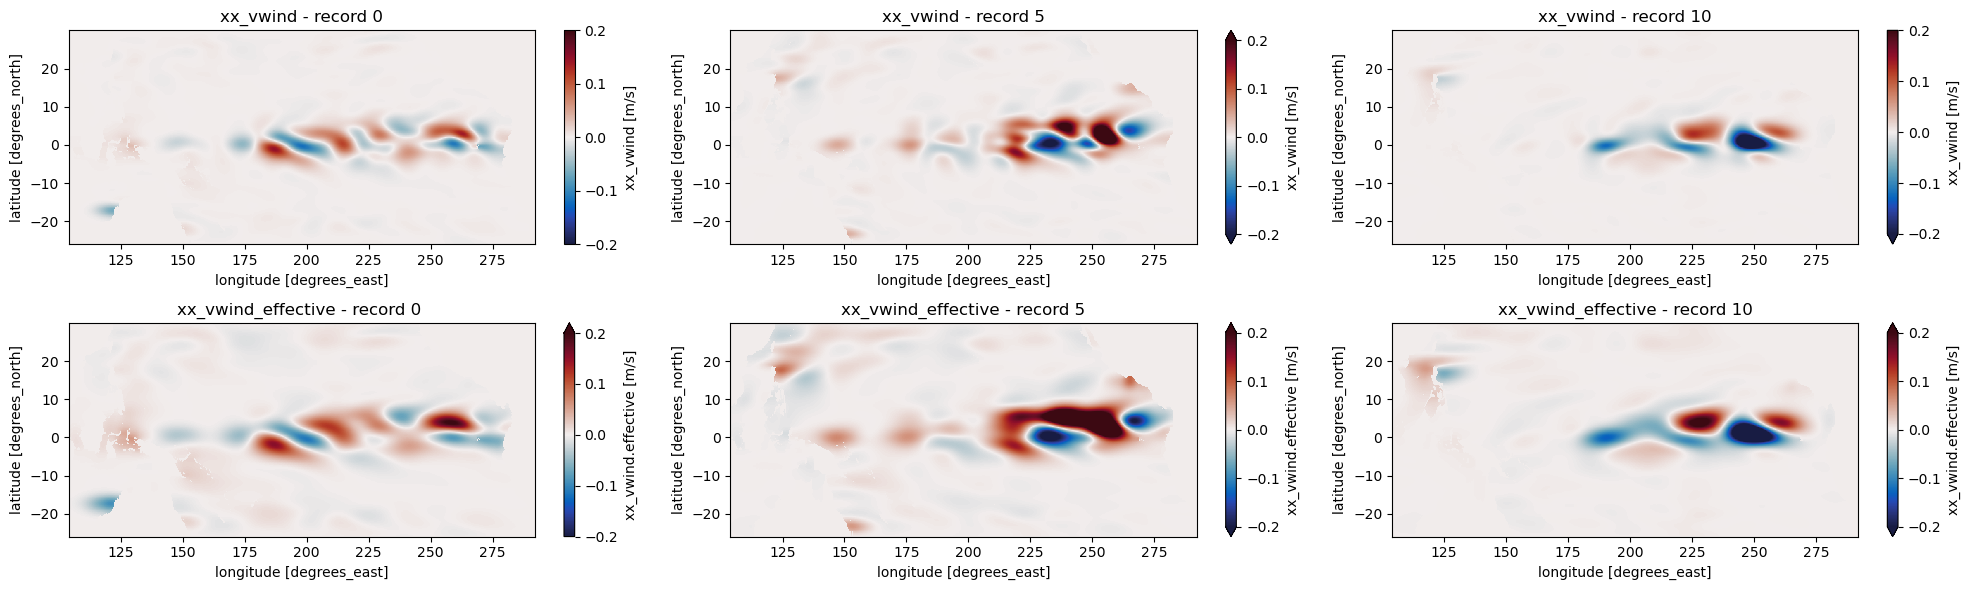

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_vwind'][0].plot(ax=axes[0,0], vmin=-2e-1, vmax=2e-1,  cmap=cmo.balance)
axes[0,0].set_title('xx_vwind - record 0')

ds['xx_vwind'][5].plot(ax=axes[0,1],vmin=-2e-1, vmax=2e-1,   cmap=cmo.balance)
axes[0,1].set_title('xx_vwind - record 5')

ds['xx_vwind'][10].plot(ax=axes[0,2],vmin=-2e-1, vmax=2e-1,  cmap=cmo.balance)
axes[0,2].set_title('xx_vwind - record 10')

ds['xx_vwind.effective'][0].plot(ax=axes[1,0], vmin=-2e-1, vmax=2e-1,   cmap=cmo.balance)
axes[1,0].set_title('xx_vwind_effective - record 0 ')

ds['xx_vwind.effective'][5].plot(ax=axes[1,1],vmin=-2e-1, vmax=2e-1,   cmap=cmo.balance)
axes[1,1].set_title('xx_vwind_effective - record 5')

ds['xx_vwind.effective'][10].plot(ax=axes[1,2],vmin=-2e-1, vmax=2e-1,  cmap=cmo.balance)
axes[1,2].set_title('xx_vwind_effective - record 10')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_vwind_iter' + str(iteration) + '.png')

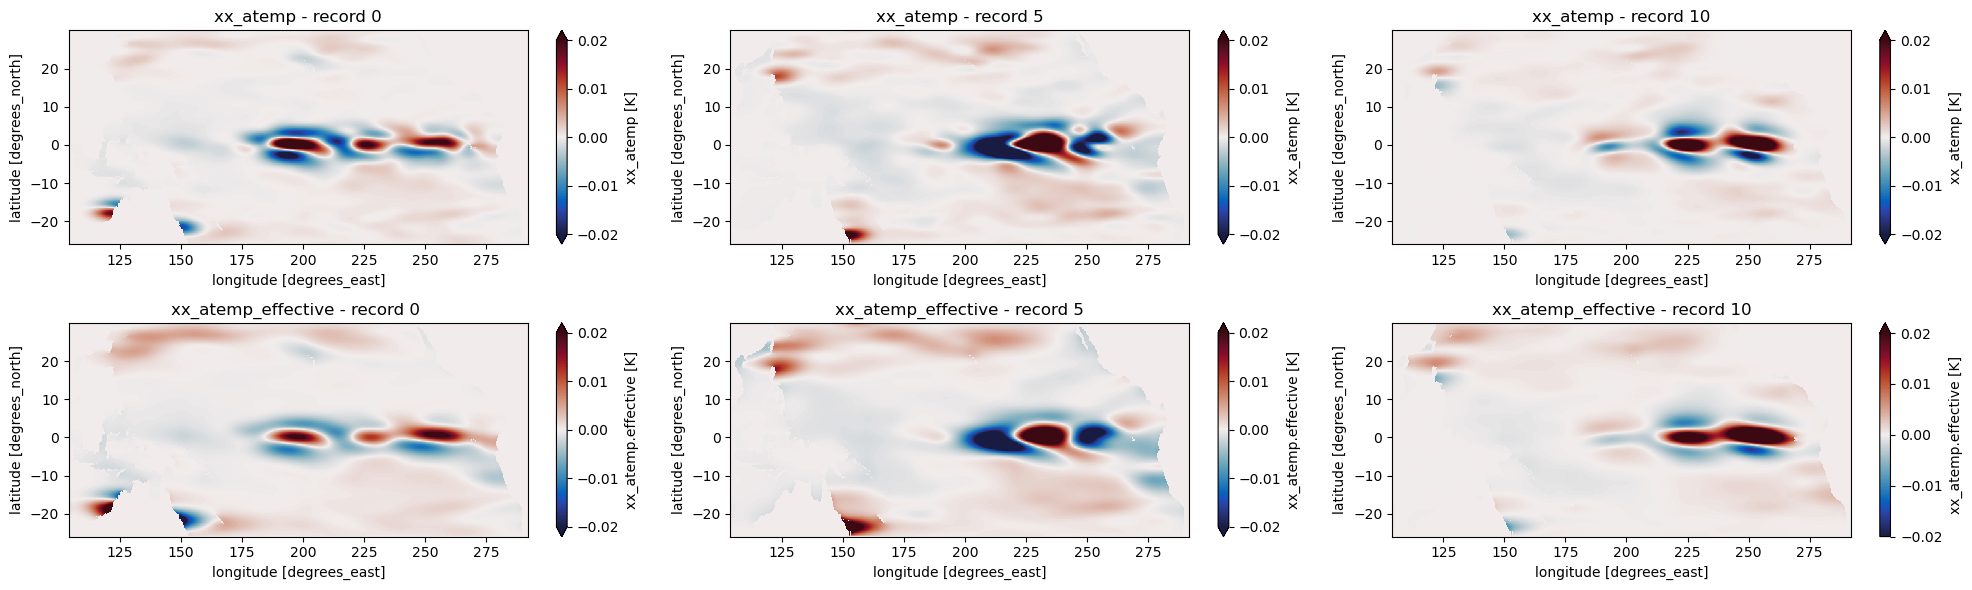

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_atemp'][0].plot(ax=axes[0,0], vmin=-2e-2, vmax=2e-2, cmap=cmo.balance)
axes[0,0].set_title('xx_atemp - record 0')

ds['xx_atemp'][5].plot(ax=axes[0,1],vmin=-2e-2, vmax=2e-2,cmap=cmo.balance)
axes[0,1].set_title('xx_atemp - record 5')

ds['xx_atemp'][10].plot(ax=axes[0,2],vmin=-2e-2, vmax=2e-2, cmap=cmo.balance)
axes[0,2].set_title('xx_atemp - record 10')

ds['xx_atemp.effective'][0].plot(ax=axes[1,0],vmin=-2e-2, vmax=2e-2, cmap=cmo.balance)
axes[1,0].set_title('xx_atemp_effective - record 0 ')

ds['xx_atemp.effective'][5].plot(ax=axes[1,1],vmin=-2e-2, vmax=2e-2,cmap=cmo.balance)
axes[1,1].set_title('xx_atemp_effective - record 5')

ds['xx_atemp.effective'][10].plot(ax=axes[1,2],vmin=-2e-2, vmax=2e-2,cmap=cmo.balance)
axes[1,2].set_title('xx_atemp_effective - record 10')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_atemp_iter' + str(iteration) + '.png')

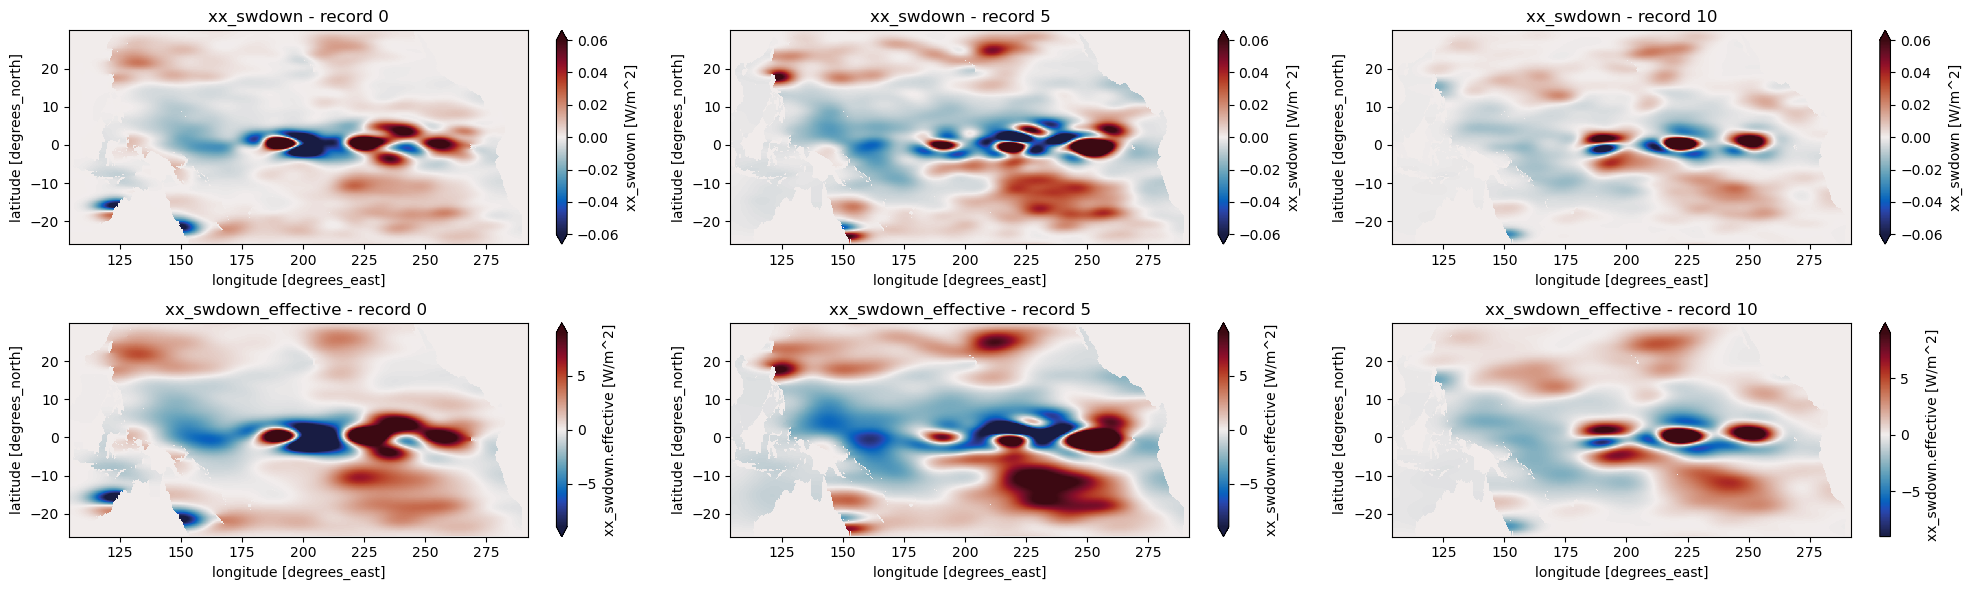

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_swdown'][0].plot(ax=axes[0,0], vmin=-6e-2, vmax=6e-2, cmap=cmo.balance)
axes[0,0].set_title('xx_swdown - record 0')

ds['xx_swdown'][5].plot(ax=axes[0,1], vmin=-6e-2, vmax=6e-2, cmap=cmo.balance)
axes[0,1].set_title('xx_swdown - record 5')

ds['xx_swdown'][10].plot(ax=axes[0,2], vmin=-6e-2, vmax=6e-2, cmap=cmo.balance)
axes[0,2].set_title('xx_swdown - record 10')

ds['xx_swdown.effective'][0].plot(ax=axes[1,0], vmin=-9, vmax=9, cmap=cmo.balance)
axes[1,0].set_title('xx_swdown_effective - record 0 ')

ds['xx_swdown.effective'][5].plot(ax=axes[1,1],vmin=-9, vmax=9,  cmap=cmo.balance)
axes[1,1].set_title('xx_swdown_effective - record 5')

ds['xx_swdown.effective'][10].plot(ax=axes[1,2],vmin=-9, vmax=9,  cmap=cmo.balance)
axes[1,2].set_title('xx_swdown_effective - record 10')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_swdown_iter' + str(iteration) + '.png')

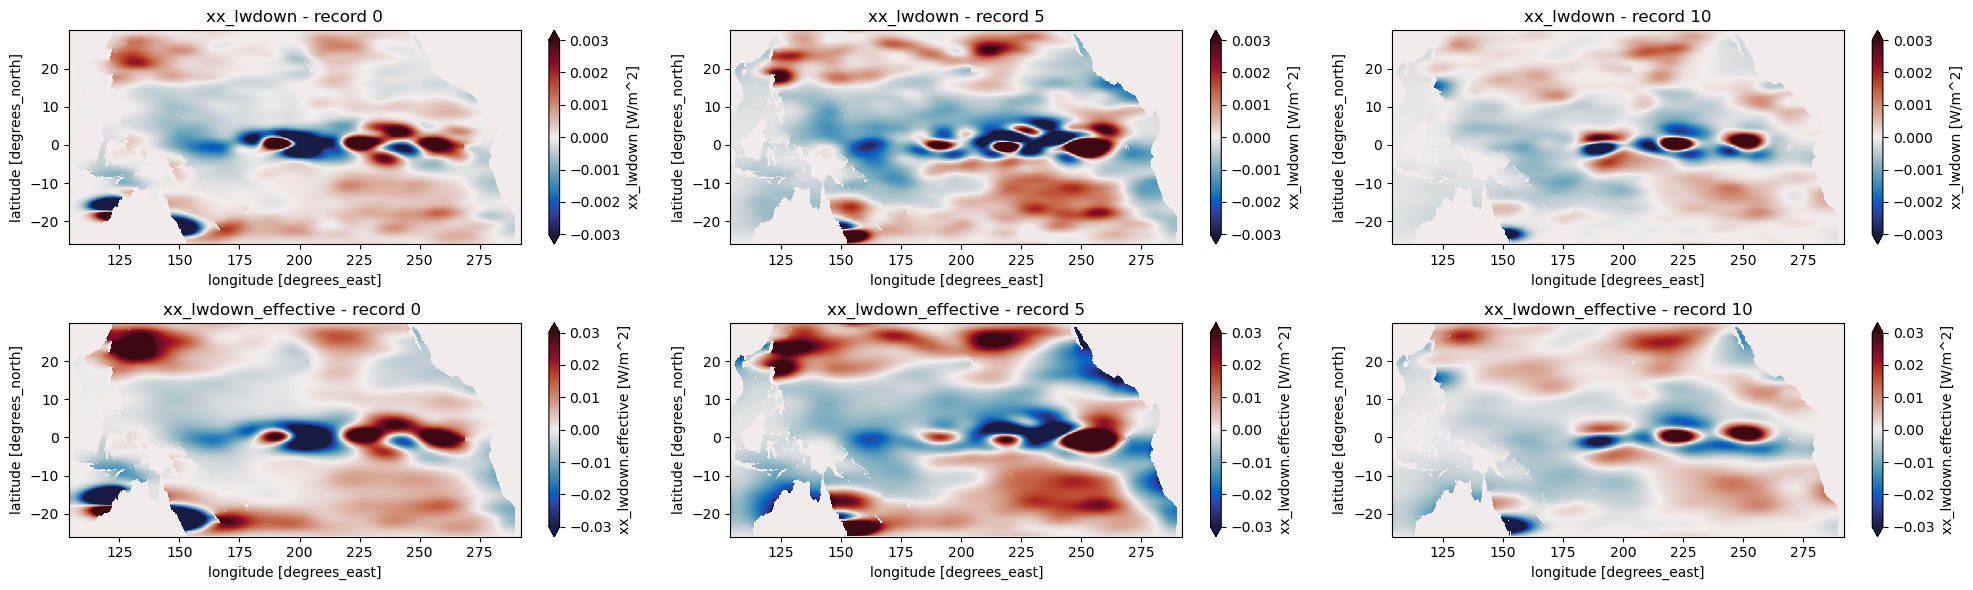

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_lwdown'][0].plot(ax=axes[0,0], cmap=cmo.balance, vmin=-3e-3, vmax=3e-3)
axes[0,0].set_title('xx_lwdown - record 0')

ds['xx_lwdown'][5].plot(ax=axes[0,1], cmap=cmo.balance, vmin=-3e-3, vmax=3e-3)
axes[0,1].set_title('xx_lwdown - record 5')

ds['xx_lwdown'][10].plot(ax=axes[0,2], cmap=cmo.balance, vmin=-3e-3, vmax=3e-3)
axes[0,2].set_title('xx_lwdown - record 10')

ds['xx_lwdown.effective'][0].plot(ax=axes[1,0], cmap=cmo.balance, vmin=-3e-2, vmax=3e-2)
axes[1,0].set_title('xx_lwdown_effective - record 0 ')

ds['xx_lwdown.effective'][5].plot(ax=axes[1,1],  cmap=cmo.balance, vmin=-3e-2, vmax=3e-2)
axes[1,1].set_title('xx_lwdown_effective - record 5')

ds['xx_lwdown.effective'][10].plot(ax=axes[1,2], cmap=cmo.balance, vmin=-3e-2, vmax=3e-2)
axes[1,2].set_title('xx_lwdown_effective - record 10')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_lwdown_iter' + str(iteration) + '.png')

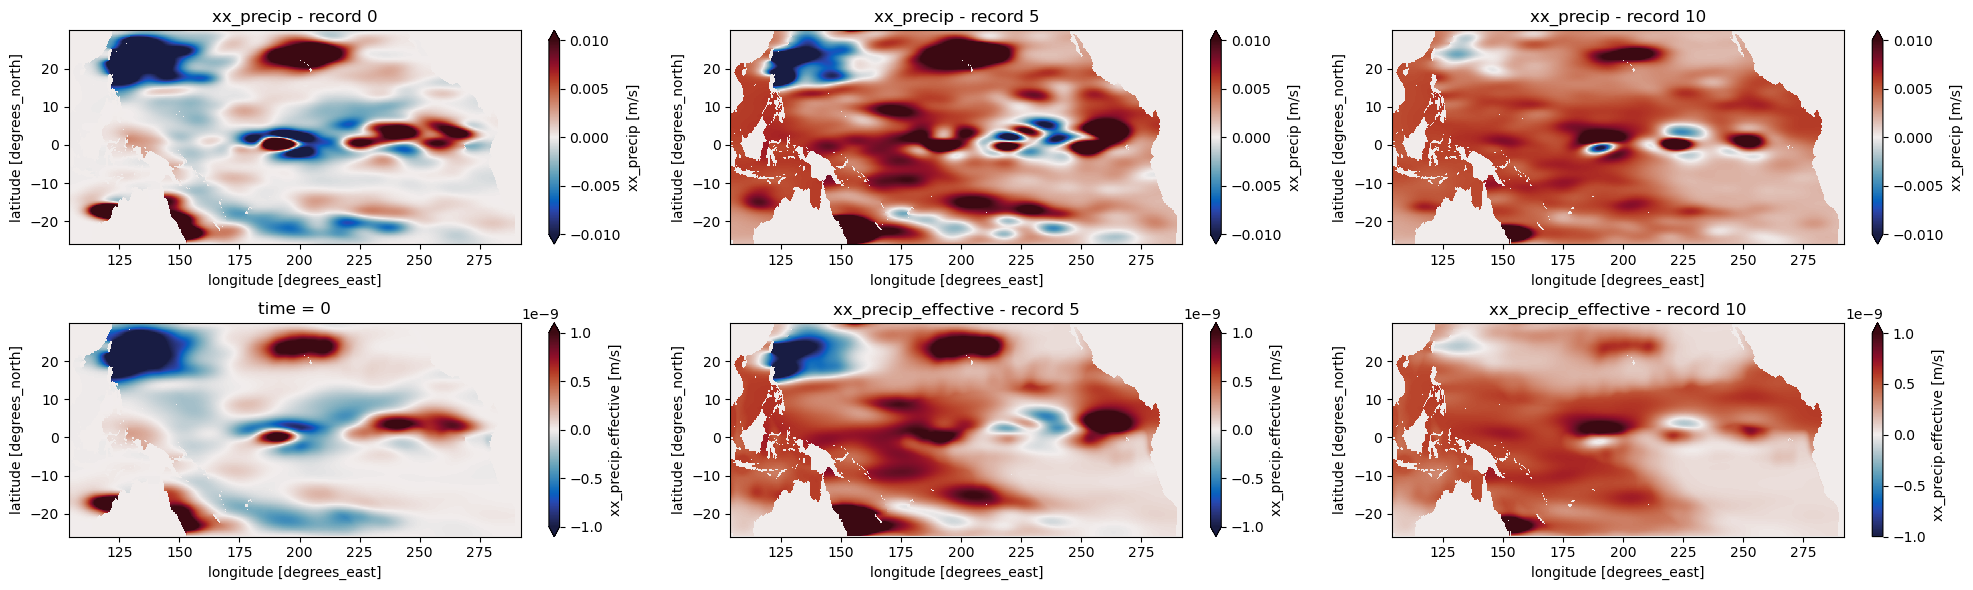

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_precip'][0].plot(ax=axes[0,0], cmap=cmo.balance, vmin=-1e-2, vmax=1e-2)
axes[0,0].set_title('xx_precip - record 0')

ds['xx_precip'][5].plot(ax=axes[0,1], cmap=cmo.balance, vmin=-1e-2, vmax=1e-2)
axes[0,1].set_title('xx_precip - record 5')

ds['xx_precip'][10].plot(ax=axes[0,2], cmap=cmo.balance, vmin=-1e-2, vmax=1e-2)
axes[0,2].set_title('xx_precip - record 10')

ds['xx_precip.effective'][0].plot(ax=axes[1,0], cmap=cmo.balance, vmin=-1e-9, vmax=1e-9)

ds['xx_precip.effective'][5].plot(ax=axes[1,1], cmap=cmo.balance, vmin=-1e-9, vmax=1e-9)
axes[1,1].set_title('xx_precip_effective - record 5')

ds['xx_precip.effective'][10].plot(ax=axes[1,2], cmap=cmo.balance, vmin=-1e-9, vmax=1e-9)
axes[1,2].set_title('xx_precip_effective - record 10')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_precip_iter' + str(iteration) + '.png')

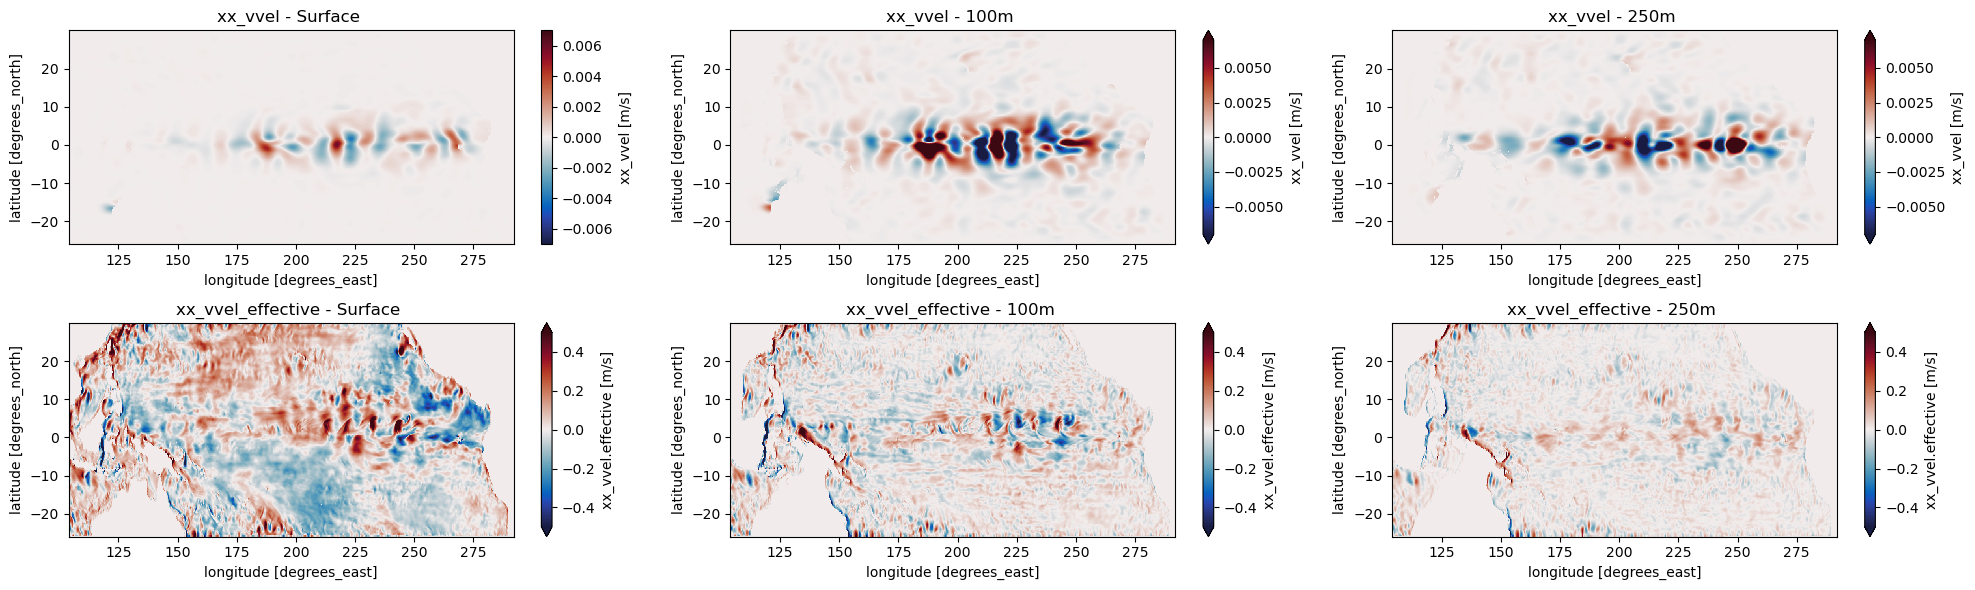

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_vvel'].sel(Z=[-1.0],method='nearest').plot(ax=axes[0,0], cmap=cmo.balance, vmin=-7e-3,vmax=7e-3)
axes[0,0].set_title('xx_vvel - Surface ')

ds['xx_vvel'].sel(Z=[-100.0],method='nearest').plot(ax=axes[0,1], cmap=cmo.balance, vmin=-7e-3,vmax=7e-3)
axes[0,1].set_title('xx_vvel - 100m ')

ds['xx_vvel'].sel(Z=[-250.0],method='nearest').plot(ax=axes[0,2], cmap=cmo.balance, vmin=-7e-3,vmax=7e-3)
axes[0,2].set_title('xx_vvel - 250m ')

ds['xx_vvel.effective'].sel(Z=[-1.0],method='nearest').plot(ax=axes[1,0], cmap=cmo.balance, vmin=-0.5,vmax=0.5)
axes[1,0].set_title('xx_vvel_effective - Surface ')

ds['xx_vvel.effective'].sel(Z=[-100.0],method='nearest').plot(ax=axes[1,1], cmap=cmo.balance, vmin=-0.5,vmax=0.5)
axes[1,1].set_title('xx_vvel_effective - 100m ')

ds['xx_vvel.effective'].sel(Z=[-250.0],method='nearest').plot(ax=axes[1,2], cmap=cmo.balance, vmin=-0.5,vmax=0.5)
axes[1,2].set_title('xx_vvel_effective - 250m ')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_vvel_iter' + str(iteration) + '.png')

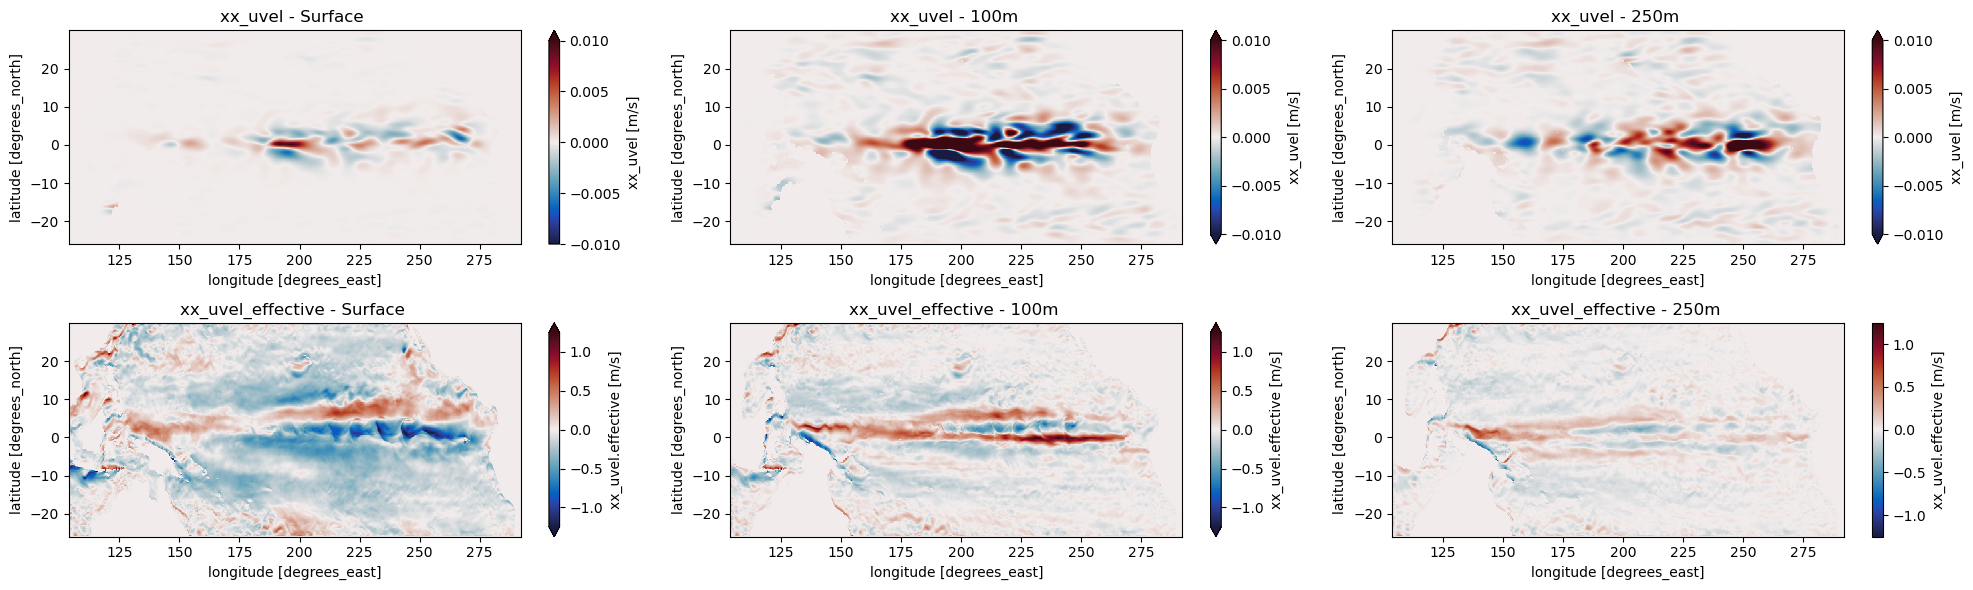

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_uvel'].sel(Z=[-1.0],method='nearest').plot(ax=axes[0,0], cmap=cmo.balance, vmin=-1e-2,vmax=1e-2)
axes[0,0].set_title('xx_uvel - Surface ')

ds['xx_uvel'].sel(Z=[-100.0],method='nearest').plot(ax=axes[0,1], cmap=cmo.balance, vmin=-1e-2,vmax=1e-2)
axes[0,1].set_title('xx_uvel - 100m ')

ds['xx_uvel'].sel(Z=[-250.0],method='nearest').plot(ax=axes[0,2], cmap=cmo.balance, vmin=-1e-2,vmax=1e-2)
axes[0,2].set_title('xx_uvel - 250m ')

ds['xx_uvel.effective'].sel(Z=[-1.0],method='nearest').plot(ax=axes[1,0], cmap=cmo.balance, vmin=-1.25,vmax=1.25)
axes[1,0].set_title('xx_uvel_effective - Surface ')

ds['xx_uvel.effective'].sel(Z=[-100.0],method='nearest').plot(ax=axes[1,1], cmap=cmo.balance, vmin=-1.25,vmax=1.25)
axes[1,1].set_title('xx_uvel_effective - 100m ')

ds['xx_uvel.effective'].sel(Z=[-250.0],method='nearest').plot(ax=axes[1,2], cmap=cmo.balance, vmin=-1.25,vmax=1.25)
axes[1,2].set_title('xx_uvel_effective - 250m ')
    
plt.tight_layout()
fig.savefig('/home/edavenport/analysis/TPOSE6_VelocityAssim/check_controls/xx_uvel_iter' + str(iteration) + '.png')

In [ ]:
cluster.close()
client.shutdown()

In [ ]:
client.close()